### 1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
#OBJETIVO: UN MODELO DE REGRESION LOGISTICA APRENDA A DIFERENCIAR DIGITOS
#uNA MATRIZ = UNA IMAGEN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() #LLega del 0 al 9 solo

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
type(digits.feature_names)

list

In [8]:
lista2 = []
for i in range(digits.data.shape[1]): #cantidad de columnas de data
    lista2.append(i) #Renombramos las columnas para poder acceder a ellas porque de la forma en la que estaba no podía acceder a ellas (no entiendo por qué)

In [9]:
#Pasamos a dataframe los valores de los pixeles que vale cada numero (del key data) y pasamos a columna los valores target, tambien cogido del key data.  Estos "targets" son el número en sí de cada fila de pixeles
df_pixeles = pd.DataFrame(data= np.c_[digits['data'], digits["target"]], columns= lista2 + ['Nuestro target'])

In [10]:
df_pixeles

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Nuestro target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


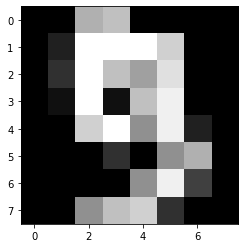

In [11]:
#A continuación estoy imprimiendo algunas filas donde su target es el digito 9 para ver que diferencias de pixeles (a nivel visual) podemos ver y que aún así lo reconoce como un 9.  He cogido la fila 9 que es el "original" y luego 2 filas al azar: el 1792 y el 1795
numero_9= df_pixeles.iloc[9]
k = np.reshape(numero_9[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

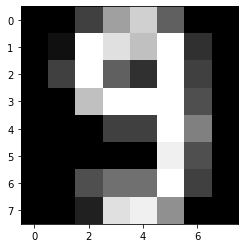

In [12]:
numero_1792= df_pixeles.iloc[1792]
k = np.reshape(numero_1792[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

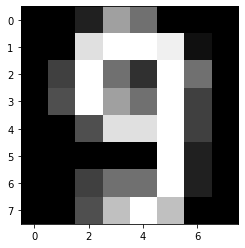

In [13]:
numero_1795= df_pixeles.iloc[1795]
k = np.reshape(numero_1795[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits["data"], digits["target"], test_size=0.25, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

LogisticRegression()

In [29]:
logisticRegr.score(x_test, y_test)

0.9511111111111111

#### SOLO NOS QUEDAMOS CON EL 1.0 Y EL 9.0:

In [ ]:
#Entiendo que lo que piden es que nos quedemos con las filas de 1 y 9 en la columna target.  

In [16]:
df_pixeles1 = df_pixeles[(df_pixeles['Nuestro target'] == 1.0) | (df_pixeles['Nuestro target'] == 9.0) ]

In [17]:
df_pixeles1

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Nuestro target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [18]:
X1 = df_pixeles1.loc[:, df_pixeles1.columns != 'Nuestro target']
y1 = df_pixeles1['Nuestro target']

In [19]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [20]:
modelo2 = LogisticRegression()
modelo2.fit(x_train,y_train)

LogisticRegression()

In [21]:
modelo2.score(x1_test,y1_test)

0.978021978021978

### Hay un ligero aumento en el score.  Esto es debido a que como hay menos opciones, el modelo se ha entrenado solamente con estas 2 opciones (1 y 9) y puede diferenciar mejor y equivocarse menos ya que "si tiene dudas" no tiene más opciones de donde sacar la probabilidad